# Traitement de données, 2022, TD3

Ceci est un notebook python, qui va être utilisé pour le TD d'ajourd'hui. Il se trouve sur Google Colab, pour être facile à partager. **Attention** : Vous devriez pouvoir l'éditer, mais tant que vous ne l'avez pas téléchargé ou copié, aucune de vos modifications ne seront sauvées. 

## NFL 

Le [fichier CSV compressé contenant des statistique sur les matche de la NFL](https://mdaquin.github.io/t/TdD_TD2_2021/NFL.csv.zip) se trouve à l'adresse https://mdaquin.github.io/t/TdD_TD2_2021/NFL.csv.zip 

Chargez le dans une DataFrame, sachant que : 
- La fonction read_csv peut lire un fichier directement de son URL
- read_csv peut lire un fichier CSV compressé au format zip sans qu'il soit besoin de le décompresser préalablement.

Le fichier est plutôt gros : il contient beaucoup de données. Explorez le pour essayer de comprendre ce qui signifient ces données. 

In [ ]:
import pandas as pd

df = pd.read_csv("https://mdaquin.github.io/t/TdD_TD2_2021/NFL.csv.zip")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [ ]:
for k in df:
  print(k, df[k].dtype, df[k].count())

Date object 407688
GameID int64 407688
Drive int64 407688
qtr int64 407688
down float64 346534
time object 407464
TimeUnder int64 407688
TimeSecs float64 407464
PlayTimeDiff float64 407244
SideofField object 407160
yrdln float64 406848
yrdline100 float64 406848
ydstogo int64 407688
ydsnet int64 407688
GoalToGo float64 406848
FirstDown float64 378877
posteam object 382696
DefensiveTeam object 382696
desc object 407686
PlayAttempted int64 407688
Yards.Gained int64 407688
sp int64 407688
Touchdown int64 407688
ExPointResult object 10110
TwoPointConv object 605
DefTwoPoint object 24
Safety int64 407688
Onsidekick int64 407688
PuntResult object 22371
PlayType object 407688
Passer object 167643
Passer_ID object 407688
PassAttempt int64 407688
PassOutcome object 168182
PassLength object 167168
AirYards int64 407688
YardsAfterCatch int64 407688
QBHit int64 407688
PassLocation object 167168
InterceptionThrown int64 407688
Interceptor object 4520
Rusher object 120564
Rusher_ID object 407688
Rush

Construisez une nouvelle DataFrame qui ne contient que les colonnes qui sont complètes à au moins 90%.

In [ ]:
tokeep = []
for k in df:
  pna = df[k].count()/len(df)
  if pna > 0.9:
    tokeep.append(k)

rdf = df[tokeep]
rdf

df.dropna(axis=1, thresh=0.9*len(df))


,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
0,2009-09-10,2009091000,1,1,15:00,15,3600.0,0.0,TEN,30.0,...,0.0,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009
1,2009-09-10,2009091000,1,1,14:53,15,3593.0,7.0,PIT,42.0,...,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009
2,2009-09-10,2009091000,1,1,14:16,15,3556.0,37.0,PIT,47.0,...,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009
3,2009-09-10,2009091000,1,1,13:35,14,3515.0,41.0,PIT,44.0,...,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009
4,2009-09-10,2009091000,1,1,13:27,14,3507.0,8.0,PIT,44.0,...,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,00:28,1,28.0,4.0,BAL,32.0,...,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2017
407684,2017-12-31,2017123101,29,4,00:28,1,28.0,0.0,BAL,23.0,...,0.0,0.200905,-0.340818,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,2017
407685,2017-12-31,2017123101,29,4,00:24,1,24.0,4.0,BAL,23.0,...,0.0,-0.139913,0.139913,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,2017
407686,2017-12-31,2017123101,30,4,00:14,1,14.0,10.0,BAL,36.0,...,0.0,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,2017


Dans le nouvelle DataFrame, trouvez pour chaque colonne le nombre de valeurs abhérantes en utilisant la méthode basée sur le z-score (>3). 

- Réduisez la DataFrame aux colonnes ayant moins de 5000 valeurs abhérantes. 
- Remplacez les valeurs abherantes par NaN dans toutes les autres.

In [ ]:
import numpy as np
crdf = rdf.copy()
for k in rdf:
  if df[k].dtype != np.object:
    azscore = abs((df[k]-df[k].mean()) /df[k].std())
    idx = df[azscore > 3].index
    if len(idx) > 5000: 
      crdf.drop(k, axis=1, inplace=True)
    else:
      crdf.loc[idx, k] = np.nan

crdf.count()/rdf.count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


AbsScoreDiff                        NaN
Accepted.Penalty                    NaN
AirYards                            NaN
AwayTeam                       1.000000
AwayTimeouts_Remaining_Post         NaN
                                 ...   
time                           1.000000
ydsnet                         0.999956
ydstogo                        0.992624
yrdline100                     1.000000
yrdln                          1.000000
Length: 71, dtype: float64

Re-calculez le taux de valeurs manquantes dans chaque colonne est réduire une fois de plus aux colonnes qui sont au moins 90% complètes.

In [ ]:
print(crdf.shape)
crdf.dropna(axis=1, thresh=0.9*len(df)).shape

(407688, 47)


(407688, 47)

Reprennez la DataFrame d'origine (avec toutes les colonnes). La colonne `ReturnResult` contient des valeurs categorielles correspondant aux résultats d'une phase du jeu (*return*). Remplacer ces valeurs par des valeurs numérique sachant que :
 - Touchback vaut 0 point
 - Fair catch vaut 3 points
 - Touchdown vaut 6 points

In [ ]:
df["ReturnResult_c"] = df.ReturnResult.replace("Touchback", 0).replace("Fair Catch", 3).replace("Touchdown", 6)
df.ReturnResult_c.describe()


count    18238.000000
mean         1.242570
std          1.780966
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max          6.000000
Name: ReturnResult_c, dtype: float64

La colonne `PlayType` indique le type d'action qui était jouée, avec des valeurs telles que pass, Kickoff, Punt, etc. 

Transformez ces valeurs en valeurs numériques. 

In [ ]:
ndf = pd.concat([df, pd.get_dummies(df.PlayType, prefix="playtype")], axis=1).drop("PlayType", axis=1)
ndf

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,playtype_No Play,playtype_Pass,playtype_Punt,playtype_QB Kneel,playtype_Quarter End,playtype_Run,playtype_Sack,playtype_Spike,playtype_Timeout,playtype_Two Minute Warning
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,0,0,0,0,0,0,0,0,0,0
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,0,1,0,0,0,0,0,0,0,0
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0,0,0,0,0,1,0,0,0,0
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,0,1,0,0,0,0,0,0,0,0
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,0,0,0,0,0,0,0,0,1,0
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,0,1,0,0,0,0,0,0,0,0
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,0,1,0,0,0,0,0,0,0,0
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,0,0,0,1,0,0,0,0,0,0


La colonne `ScoreDiff` contient la différence de scores entre les deux équipes. Testez les discretisations à largeur égale, à taille égale et homogènes avec un nombre de groupes de 2, 4 et 10. Placez les résultats dans une nouvelle colonne et regardez la distribution des valeurs. 

Pour inspecter visuellement la distribution des valeurs, vous pouvez utiliser la fonction `hist()` sur la nouvelle colonne. Celle-ci construit un histogramme.

[array([-59.        , -28.3113682 , -18.74341077, -11.32321547,
         -4.50110996,   1.94041981,   8.33625689,  15.05140855,
         22.26648885,  31.24235169,  59.        ])             ]


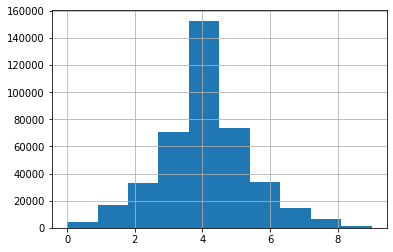

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins = 10, encode="ordinal", strategy="kmeans")
disc.fit(df[ ["ScoreDiff"] ].fillna(df.ScoreDiff.mean()))
df["ScoreDiff_d"] = disc.transform(df[ ["ScoreDiff"] ].fillna(df.ScoreDiff.mean()))
print(disc.bin_edges_)
df.ScoreDiff_d.hist()


Créez deux versions de la DataFrame, une avec toutes les colonnes numériques normalisées en utilisant la normalisation minmax, et l'autre où ces colonnes sont standardisées (c'est-à-dire centrées sur la moyenne). 

In [ ]:
ndf = pd.DataFrame()
sdf = pd.DataFrame()
for k in df: 
  if df[k].dtype == np.object:
    ndf[k] = df[k]
    sdf[k] = df[k]
  else :
    ndf[k] = (df[k]-df[k].min())/(df[k].max()-df[k].min())
    sdf[k] = (df[k] - df[k].mean())/(df[k].std())

print(ndf.describe())
print(sdf.describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

              GameID          Drive            qtr           down  \
count  407688.000000  407688.000000  407688.000000  346534.000000   
mean        0.506286       0.332828       0.394353       0.334159   
std         0.320319       0.210280       0.282437       0.335451   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.250234       0.147059       0.250000       0.000000   
50%         0.500491       0.323529       0.500000       0.333333   
75%         0.750774       0.500000       0.750000       0.666667   
max         1.000000       1.000000       1.000000       1.000000   

           TimeUnder       TimeSecs   PlayTimeDiff          yrdln  \
count  407688.000000  407464.000000  407244.000000  406848.000000   
mean        0.491613       0.576726       0.021821       0.560986   
std         0.309493       0.236178       0.019055       0.264214   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.200000       0.3728

Completez les valeurs manquantes dans toutes les colonnes numériques incomplètes dans ces deux DataFrames de la façon suivante : 
- Dans la DataFrame normalisée, remplir les valeurs manquantes avec la moyenne de la colonne correspondante.
- Dans la DataFrame standardisée, remplir chaque valeur manquante par la moyenne des valeurs correspondantes dans les 10 rangées les plus similaires, en utilisant toutes les colonnes numériques 100% complètes pour calculer la similarité/distance.


In [ ]:
df.col.fillna()

Idenfifiez la valeur la plus rare dans la colonne SideofField et la remplacer par `None`.

Remplacez ensuite toutes les valeurs manquantes dans la colonne SideofField avec la valeur de cette colonne dans la rangée la plus similaire d'après les valeurs des colonnes numériques 100% complètes. 

In [ ]:
df.SideofField.value_counts().idxmin()

'50'

## Données sur l'obésité

Le [fichier CSV contenant des statistique sur le taux d'obésité dans chaque pays](https://mdaquin.github.io/t/TdD_TD2_2021/obesity.csv) se trouve à l'adresse https://mdaquin.github.io/t/TdD_TD2_2021/obesity.csv 

1. Chargez le dans une DataFrame.
2. Créez une nouvelle colonne "Country" avec les valeurs de la colonne "Unnamed: 0" 
3. Faites que l'index de la DataFrame soit la colonne "Country"
4. Transposez la DataFrame
5. Reduisez la DataFrame aux colonnes "France", "Germany", et "Spain"
6. Reduisez la DataFrame aux rangées après celle à l'index "2016" (incluse)

Pensez à verifier vos résultats à chaque étape.

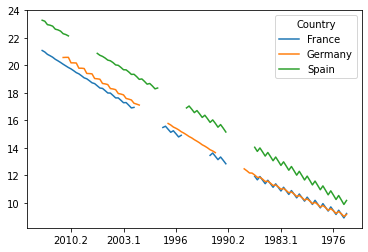

In [ ]:
odf = pd.read_csv("https://mdaquin.github.io/t/TdD_TD2_2021/obesity.csv")
odf["Country"] = odf["Unnamed: 0"]
odf = odf.set_index("Country")
todf = odf.transpose()
rtodf = todf[["France", "Germany", "Spain"]]
rtodf = rtodf["2016":]

def getNum(x):
  if type(x) == str : 
    return float(x[:x.index('[')-1])
  return x
rtodf ["France"] = rtodf["France"].apply(getNum)
rtodf ["Germany"] = rtodf["Germany"].apply(getNum)
rtodf ["Spain"] = rtodf["Spain"].apply(getNum)

rtodf.rolling(10).mean().plot()

Vous remarquerez que les valeurs sont des chaines de caractères. Transformez ces valeurs pour obtenir les valeurs numériques qui se trouve avant le caractère '[' dans chaque colonne.

Si `df` est une DataFrame, `df.plot()` affiche un graphe de ses colonnes numériques. Utilisez cette commande pour visualiser les valeurs dans les trois colonnes de la DataFrame.

In [ ]:
# votre code ici 


Complétez les valeurs manquantes dans les trois colonnes en utilisant l'interpolation, et affichez le graphe pour verifier. 

In [ ]:
# votre code ici 


Lissez les trois colonnes en utilisant la moyenne glissante centrée avec une fenêtre de 10 éléments. 

Affichez le graphe pour vérifier.


In [ ]:
# votre code ici 
